## Test

In [2]:
from dcapy.schedule import Well, WellsGroup, Period, Scenario
from dcapy import dca
import numpy as np 
import pandas as pd 


In [3]:
time_drill = np.arange(0,6,3)
list_wells = []
for i,v in enumerate(time_drill):

  p = Period(
      name='base',
      dca = dca.Arps(
        qi = 1000,
        di = 0.35,
        ti = v,
        b=0,
        freq_di = 'A'
      ),
      start = 0,
      end=120,
      freq_output='M',
      freq_input='M'
  )

  w = Well(
        name = f'well_{i+1}',
        scenarios = [
          Scenario(name='sc', periods = [p])
        ]
    )
  list_wells.append(w)


gw = WellsGroup(name='channel_wells',wells=list_wells)
gw.tree()

🏭channel_wells                                                                              
┣━━ 🗼well_1                                                                                 
┃   ┗━━ 🔀sc                                                                                 
┃       ┗━━ 📉base                                                                           
┗━━ 🗼well_2                                                                                 
    ┗━━ 🔀sc                                                                                 
        ┗━━ 📉base                                                                           

In [4]:
gw.generate_forecast(freq_output='M')

/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:68: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:85: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:86: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:68: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:85: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:86: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


,oil_rate,oil_cum,iteration,oil_volume,period,scenario,well
date,,,,,,,
0,1000.000000,0.000000,0,29566.722637,base,sc,well_1
1,971.254575,29566.722637,0,29141.768636,base,sc,well_1
2,943.335450,58283.537273,0,28304.076118,base,sc,well_1
3,916.218872,86174.874873,0,27490.463427,base,sc,well_1
4,889.881771,113264.464127,0,26700.238378,base,sc,well_1
...,...,...,...,...,...,...,...
115,38.133327,989348.578409,0,1144.162002,base,sc,well_2
116,37.037168,990476.055898,0,1111.272580,base,sc,well_2
117,35.972519,991571.123568,0,1079.328577,base,sc,well_2


/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:68: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:85: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:86: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


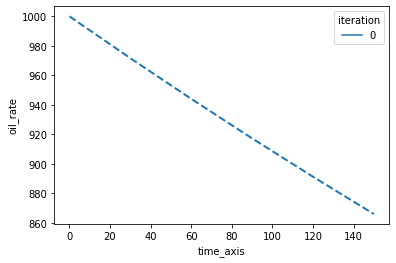

In [12]:
dca.Arps(
        qi = 1000,
        di = 0.35,
        ti = 0,
        b=0,
        freq_di = 'A'
).plot(start=0, end=160, freq_input='D',freq_output='M')

In [13]:
dca.Arps(
        qi = 1000,
        di = 0.35,
        ti = 0,
        b=0,
        freq_di = 'A'
).forecast(start=0, end=160, freq_input='D',freq_output='M')

/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:68: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:85: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:86: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


,oil_rate,oil_cum,iteration,oil_volume
date,,,,
0,1000.000000,0.000000,0,29572.601300
30,971.642711,29572.601300,0,29153.301901
60,944.089558,58306.603801,0,28326.593296
90,917.317738,86225.787892,0,27523.327906
120,891.305094,113353.259613,0,26742.840944
150,866.030097,139711.469780,0,26358.210168
